In [4]:
import pandas
data = pandas.read_csv("../data/data_banknote_authentication.txt", header=None, sep=",", decimal=".")
print(data)
print(data.shape)

             0         1          2         3  4
0     3.621600   8.66610  -2.807300 -0.446990  0
1     4.545900   8.16740  -2.458600 -1.462100  0
2     3.866000  -2.63830   1.924200  0.106450  0
3     3.456600   9.52280  -4.011200 -3.594400  0
4     0.329240  -4.45520   4.571800 -0.988800  0
5     4.368400   9.67180  -3.960600 -3.162500  0
6     3.591200   3.01290   0.728880  0.564210  0
7     2.092200  -6.81000   8.463600 -0.602160  0
8     3.203200   5.75880  -0.753450 -0.612510  0
9     1.535600   9.17720  -2.271800 -0.735350  0
10    1.224700   8.77790  -2.213500 -0.806470  0
11    3.989900  -2.70660   2.394600  0.862910  0
12    1.899300   7.66250   0.153940 -3.110800  0
13   -1.576800  10.84300   2.546200 -2.936200  0
14    3.404000   8.72610  -2.991500 -0.572420  0
15    4.676500  -3.38950   3.489600  1.477100  0
16    2.671900   3.06460   0.371580  0.586190  0
17    0.803550   2.84730   4.343900  0.601700  0
18    1.447900  -4.87940   8.342800 -2.108600  0
19    5.242300  11.0

In [5]:
X = data[[0, 1, 2, 3]]
print(X)
print(X.shape)

             0         1          2         3
0     3.621600   8.66610  -2.807300 -0.446990
1     4.545900   8.16740  -2.458600 -1.462100
2     3.866000  -2.63830   1.924200  0.106450
3     3.456600   9.52280  -4.011200 -3.594400
4     0.329240  -4.45520   4.571800 -0.988800
5     4.368400   9.67180  -3.960600 -3.162500
6     3.591200   3.01290   0.728880  0.564210
7     2.092200  -6.81000   8.463600 -0.602160
8     3.203200   5.75880  -0.753450 -0.612510
9     1.535600   9.17720  -2.271800 -0.735350
10    1.224700   8.77790  -2.213500 -0.806470
11    3.989900  -2.70660   2.394600  0.862910
12    1.899300   7.66250   0.153940 -3.110800
13   -1.576800  10.84300   2.546200 -2.936200
14    3.404000   8.72610  -2.991500 -0.572420
15    4.676500  -3.38950   3.489600  1.477100
16    2.671900   3.06460   0.371580  0.586190
17    0.803550   2.84730   4.343900  0.601700
18    1.447900  -4.87940   8.342800 -2.108600
19    5.242300  11.02720  -4.353000 -4.101300
20    5.786700   7.89020  -2.61960

In [6]:
Y = data[[4]]
print(Y)
print(Y.shape)

      4
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
...  ..
1342  1
1343  1
1344  1
1345  1
1346  1
1347  1
1348  1
1349  1
1350  1
1351  1
1352  1
1353  1
1354  1
1355  1
1356  1
1357  1
1358  1
1359  1
1360  1
1361  1
1362  1
1363  1
1364  1
1365  1
1366  1
1367  1
1368  1
1369  1
1370  1
1371  1

[1372 rows x 1 columns]
(1372, 1)


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1029, 4)
(343, 4)
(1029, 1)
(343, 1)


In [8]:
from sklearn.tree import DecisionTreeClassifier
default_tree = DecisionTreeClassifier()
default_tree = default_tree.fit(X_train, Y_train)

Y_pred_train = default_tree.predict(X_train)
Y_pred_test = default_tree.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(Y_train, Y_pred_train))
print(accuracy_score(Y_test, Y_pred_test))

1.0
0.991253644315


In [9]:
from sklearn.tree import DecisionTreeClassifier
two_tree = DecisionTreeClassifier(criterion='entropy', max_depth=50)
two_tree = two_tree.fit(X_train, Y_train)

Y_pred_train = two_tree.predict(X_train)
Y_pred_test = two_tree.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(Y_train, Y_pred_train))
print(accuracy_score(Y_test, Y_pred_test))

1.0
0.985422740525


In [10]:
from sklearn.tree import DecisionTreeClassifier
three_tree = DecisionTreeClassifier(criterion='entropy', max_depth=50, min_weight_fraction_leaf=0.4)
three_tree = three_tree.fit(X_train, Y_train)

Y_pred_train = three_tree.predict(X_train)
Y_pred_test = three_tree.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(Y_train, Y_pred_train))
print(accuracy_score(Y_test, Y_pred_test))

0.847424684159
0.819241982507


In [11]:
from sklearn.tree import DecisionTreeClassifier
default_tree = DecisionTreeClassifier()
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=default_tree, X=X, y=Y, scoring="accuracy", cv=5)
print(scores)
print(scores.mean())

[ 0.98909091  0.97090909  0.97810219  0.98540146  0.98540146]
0.981781021898


In [12]:
from sklearn.tree import DecisionTreeClassifier
two_tree = DecisionTreeClassifier(criterion='entropy', max_depth=50)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=two_tree, X=X, y=Y, scoring="accuracy", cv=5)
print(scores)
print(scores.mean())

[ 0.97818182  0.98909091  0.98905109  0.98540146  0.99270073]
0.986885202389


In [13]:
from sklearn.tree import DecisionTreeClassifier
three_tree = DecisionTreeClassifier(criterion='entropy', max_depth=50, min_weight_fraction_leaf=0.4)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=three_tree, X=X, y=Y, scoring="accuracy", cv=5)
print(scores)
print(scores.mean())

[ 0.86181818  0.82181818  0.82116788  0.87956204  0.81751825]
0.840376907764


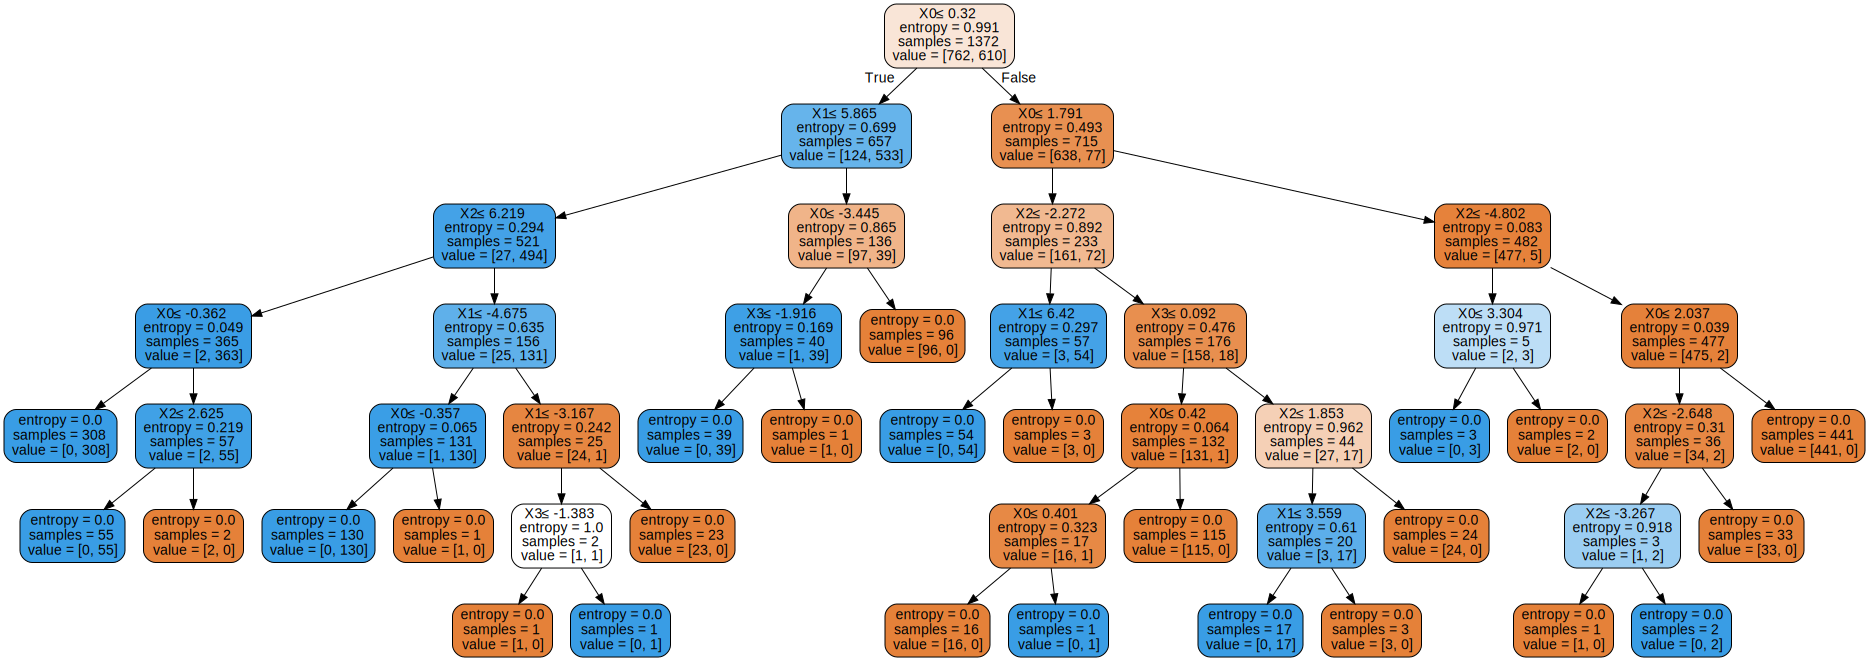

In [14]:
import graphviz
import sklearn.tree as tree
two_tree = DecisionTreeClassifier(criterion='entropy', max_depth=50)
two_tree.fit(X, Y)
dot_data = tree.export_graphviz(two_tree, out_file=None,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

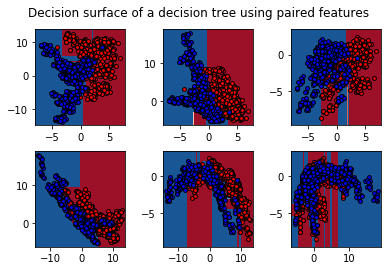

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 2
plot_colors = "rb"
plot_step = 0.02

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = data.iloc[:, pair]

    # Train
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=50).fit(X, Y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu)

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(Y == i)
        plt.scatter(X.values[idx, 0], X.values[idx, 1], c=color,
                    cmap=plt.cm.RdBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.axis("tight")
plt.show()